In [17]:
# Titanic Tutorial
# 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_data = pd.read_csv("train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_data = pd.read_csv("test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [12]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


In [42]:
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

#model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model = RandomForestClassifier(random_state=1)
random_forest = model.fit(X, y)


In [43]:
# train_data.shape[1]
# 正解率
model.score(X, y)

0.8170594837261503

In [44]:
header = np.array(train_data.drop(['Survived', 'PassengerId'], axis=1).columns)
print(header)
print(model.feature_importances_)

['Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare' 'Cabin'
 'Embarked']
[0.21588728 0.10166946 0.1103763  0.30594097 0.26612599]


ValueError: shape mismatch: objects cannot be broadcast to a single shape

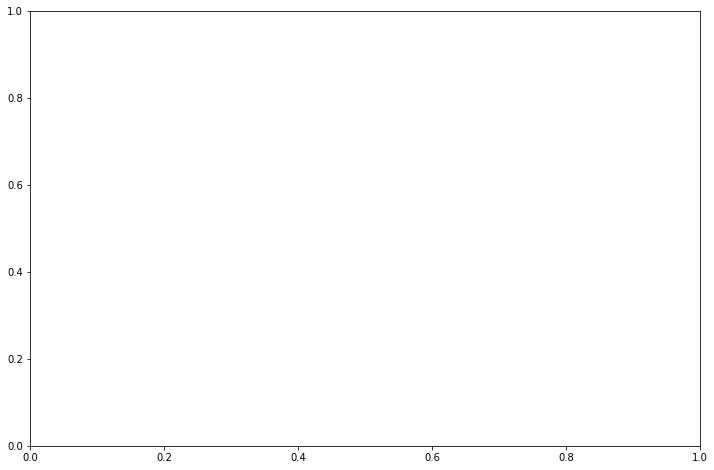

In [32]:
# 特徴量の重要度を表示
random_forest.feature_importances_

# 描画
plt.figure(figsize = (12, 8))
plt.barh(range(train_data.shape[1]), random_forest.feature_importances_, height = 0.5)
plt.yticks(range(train_data.shape[1]), feature, fontsize = 20)
plt.xlabel("Feature importances", fontsize = 30)
plt.show()

In [23]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(model, X ,y, margin = 0.3):
    _x1 = np.linspace(X[:, 0].min()-margin, X[:, 0].max()+margin, 100)
    _x2 = np.linspace(X[:, 1].min()-margin, X[:, 1].max()+margin, 100)
    x1, x2 = np.meshgrid(_x1, _x2)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = model.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['mediumblue', 'orangered'])
    plt.contourf(x1, x2, y_pred, alpha = 0.3, cmap = custom_cmap)
    
def plot_dataset(X, y):
    plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "bo", ms = 15)
    plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "r^", ms = 15)
    plt.xlabel("$x_0$", fontsize = 30)
    plt.ylabel("$x_1$", fontsize = 30, rotation = 0)
    
plt.figure(figsize = (12, 8))
plot_dataset(X, y)
plt.show()

TypeError: '(slice(None, None, None), 0)' is an invalid key

<Figure size 864x576 with 0 Axes>

TypeError: '(slice(None, None, None), 0)' is an invalid key

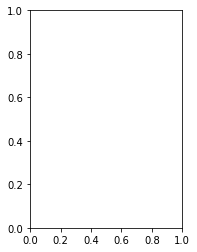

In [26]:
plt.subplot(122)
plot_decision_boundary(random_forest, X, y)
plot_dataset(X, y)
plt.title('RandomForestClassifier',fontsize=20)

plt.show()


In [45]:
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
